In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip3 install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566162 sha256=b940c6875c8808f1361b42706c338c50ce03ccc75ca13fe4af02c3b5931e1262
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [6]:

import glob
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import face_recognition
#Check if the file is corrupted or not
def validate_video(vid_path,train_transforms):
      transform = train_transforms
      count = 20
      video_path = vid_path
      frames = []
      a = int(100/count)
      first_frame = np.random.randint(0,a)
      temp_video = video_path.split('/')[-1]
      for i,frame in enumerate(frame_extract(video_path)):
        frames.append(transform(frame))
        if(len(frames) == count):
          break
      frames = torch.stack(frames)
      frames = frames[:count]
      return frames
#extract a from from video
def frame_extract(path):
  vidObj = cv2.VideoCapture(path)
  success = 1
  while success:
      success, image = vidObj.read()
      if success:
          yield image

im_size = 112
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

train_transforms = transforms.Compose([
                                        transforms.ToPILImage(),
                                        transforms.Resize((im_size,im_size)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean,std)])
video_fil = glob.glob('/content/drive/MyDrive/Processed_Videos/Celebrity_Real_Face/*.mp4')
print("Total no of videos :" , len(video_fil))
video_fil +=  glob.glob('/content/drive/MyDrive/Processed_Videos/Celebrity_Fake_Face/*.mp4')
print("Total no of videos :" , len(video_fil))
video_fil = glob.glob('/content/drive/MyDrive/Processed_Videos/DFDC_Fake_Face/*.mp4')
print("Total no of videos :" , len(video_fil))
video_fil += glob.glob('/content/drive/MyDrive/Processed_Videos/DFDC_Real_Face/*.mp4')
print("Total no of videos :" , len(video_fil))
video_fil = glob.glob('/content/drive/MyDrive/Processed_Videos/FF_Face/*.mp4')
print("Total no of videos :" , len(video_fil))
print(video_fil)
count = 0;
for i in video_fil:
  try:
    count+=1
    validate_video(i,train_transforms)
  except:
    print("Number of video processed: " , count ," Remaining : " , (len(video_fil) - count))
    print("Corrupted video is : " , i)
    continue
print((len(video_fil) - count))

Total no of videos : 588
Total no of videos : 1184
Total no of videos : 377
Total no of videos : 2103
Total no of videos : 1989
['/content/drive/MyDrive/Processed_Videos/FF_Face/770.mp4', '/content/drive/MyDrive/Processed_Videos/FF_Face/986.mp4', '/content/drive/MyDrive/Processed_Videos/FF_Face/719.mp4', '/content/drive/MyDrive/Processed_Videos/FF_Face/726_713.mp4', '/content/drive/MyDrive/Processed_Videos/FF_Face/762_832.mp4', '/content/drive/MyDrive/Processed_Videos/FF_Face/731.mp4', '/content/drive/MyDrive/Processed_Videos/FF_Face/735.mp4', '/content/drive/MyDrive/Processed_Videos/FF_Face/730.mp4', '/content/drive/MyDrive/Processed_Videos/FF_Face/724.mp4', '/content/drive/MyDrive/Processed_Videos/FF_Face/764_850.mp4', '/content/drive/MyDrive/Processed_Videos/FF_Face/720.mp4', '/content/drive/MyDrive/Processed_Videos/FF_Face/122.mp4', '/content/drive/MyDrive/Processed_Videos/FF_Face/123.mp4', '/content/drive/MyDrive/Processed_Videos/FF_Face/135_880.mp4', '/content/drive/MyDrive/Proce

In [7]:
#to load preprocessod video to memory
import json
import glob
import numpy as np
import cv2
import copy
import random
video_files =  glob.glob('/content/drive/MyDrive/Processed_Videos/Celebrity_Fake_Face/*.mp4')
video_files += glob.glob('/content/drive/MyDrive/Processed_Videos/Celebrity_Real_Face/*.mp4')
video_files = glob.glob('/content/drive/MyDrive/Processed_Videos/DFDC_Fake_Face/*.mp4')
video_files += glob.glob('/content/drive/MyDrive/Processed_Videos/DFDC_Real_Face/*.mp4')
video_files = glob.glob('/content/drive/MyDrive/Processed_Videos/FF_Face/*.mp4')
random.shuffle(video_files)
random.shuffle(video_files)
frame_count = []
for video_file in video_files:
  cap = cv2.VideoCapture(video_file)
  if(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))<100):
    video_files.remove(video_file)
    continue
  frame_count.append(int(cap.get(cv2.CAP_PROP_FRAME_COUNT)))
print("frames are " , frame_count)
print("Total no of video: " , len(frame_count))
print('Average frame per video:',np.mean(frame_count))

frames are  [148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 147, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 147, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 115, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 146, 148, 148, 148, 148, 14

In [8]:

import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import face_recognition
class video_dataset(Dataset):
    def __init__(self,video_names,labels,sequence_length = 60,transform = None):
        self.video_names = video_names
        self.labels = labels
        self.transform = transform
        self.count = sequence_length
    def __len__(self):
        return len(self.video_names)
    def __getitem__(self,idx):
        video_path = self.video_names[idx]
        frames = list(self.frame_extract(video_path))
        a = int(100/self.count)
        first_frame = np.random.randint(0,a)
        temp_video = video_path.split('/')[-1]
        #print(temp_video)
        if len(labels) == 0:
            print("No labels found.")
            return frames, None
        label = self.labels.iloc[(labels.loc[labels["file"] == temp_video].index.values[0]),1]
        if(label == 'FAKE'):
          label = 0
        if(label == 'REAL'):
          label = 1
        for i,frame in enumerate(frames):
          frames[i] = self.transform(frame)
          if(len(frames) == self.count):
            break
        frames = torch.stack(frames)
        frames = frames[:self.count]

        return frames,label


    def frame_extract(self,path):
      vidObj = cv2.VideoCapture(path)
      success = 1
      while success:
          success, image = vidObj.read()
          if success:
              yield image
#plot the image
def im_plot(tensor):
    image = tensor.cpu().numpy().transpose(1,2,0)
    b,g,r = cv2.split(image)
    image = cv2.merge((r,g,b))
    image = image*[0.22803, 0.22145, 0.216989] +  [0.43216, 0.394666, 0.37645]
    image = image*255.0
    plt.imshow(image.astype(int))
    plt.show()

In [10]:
def number_of_real_and_fake_videos(data_list):
  header_list = ["file","label"]
  lab = pd.read_csv('/content/drive/MyDrive/Gobal_metadata.csv',names=header_list)
  fake = 0
  real = 0
  if len(lab) > 0:
    for i in data_list:
      temp_video = i.split('/')[-1]
      if labels.loc[labels["file"] == temp_video].empty:
        print("No video with file name " + temp_video + " found.")
      else:
        label = lab.iloc[(labels.loc[labels["file"] == temp_video].index.values[0]),1]
        if(label == 'FAKE'):
          fake+=1
        if(label == 'REAL'):
          real+=1

  return real, fake


Train set size: 1385
Validation set size: 397
Test set size: 197


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


TRAIN:  Real: 705  Fake: 680
VALID:  Real: 194  Fake: 203
TEST:  Real: 91  Fake: 106


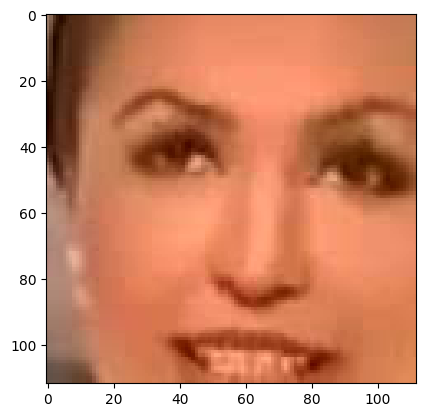

In [11]:

# load the labels and video in data loader
import random
import pandas as pd
from sklearn.model_selection import train_test_split

total_files = len(video_files)
train_ratio = 0.7
test_ratio = 0.1

# Calculate the sizes of train, test, and validation sets
train_size = int(train_ratio * total_files)
test_size = int(test_ratio * total_files)
valid_size = total_files - train_size - test_size

# Split the video files into train, test, and validation sets
train_videos = video_files[:train_size]
test_videos = video_files[train_size:train_size+test_size]
valid_videos = video_files[train_size+test_size:]

# Print the sizes of the train, test, and validation sets
print("Train set size:", len(train_videos))
print("Validation set size:", len(valid_videos))
print("Test set size:", len(test_videos))


header_list = ["file","label"]
labels = pd.read_csv('/content/drive/My Drive/Gobal_metadata.csv',names=header_list)

trainCount = number_of_real_and_fake_videos(train_videos)
validCount = number_of_real_and_fake_videos(valid_videos)
testCount = number_of_real_and_fake_videos(test_videos)
print("TRAIN: ", "Real:",trainCount[0]," Fake:",trainCount[1])
print("VALID: ", "Real:",validCount[0]," Fake:",validCount[1])
print("TEST: ", "Real:",testCount[0]," Fake:",testCount[1])


im_size = 112
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

train_transforms = transforms.Compose([
                                        transforms.ToPILImage(),
                                        transforms.Resize((im_size,im_size)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean,std)])

valid_transforms = transforms.Compose([
                                        transforms.ToPILImage(),
                                        transforms.Resize((im_size,im_size)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean,std)])

test_transforms = transforms.Compose([
                                        transforms.ToPILImage(),
                                        transforms.Resize((im_size,im_size)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean,std)])

train_data = video_dataset(train_videos,labels,sequence_length = 10,transform = train_transforms)
val_data = video_dataset(valid_videos,labels,sequence_length = 10,transform = train_transforms)
test_data = video_dataset(test_videos,labels,sequence_length = 10,transform = train_transforms)

train_loader = DataLoader(train_data,batch_size = 4,shuffle = True,num_workers = 4)
valid_loader = DataLoader(val_data,batch_size = 4,shuffle = True,num_workers = 4)
test_loader = DataLoader(test_data,batch_size = 4,shuffle = True,num_workers = 4)

image,label = train_data[0]
im_plot(image[0,:,:,:])

In [12]:
num_inputs = len(valid_loader.dataset)

print("Number of inputs:", num_inputs)

Number of inputs: 397


In [13]:
num_batches = len(valid_loader)

print("Number of batches:", num_batches)

Number of batches: 100


In [14]:
#Model with feature visualization
from torch import nn
from torchvision import models
class Model(nn.Module):
    def __init__(self, num_classes,latent_dim= 2048, lstm_layers=1 , hidden_dim = 2048, bidirectional = False):
        super(Model, self).__init__()
        model = models.resnext50_32x4d(pretrained = True) #Residual Network CNN
        self.model = nn.Sequential(*list(model.children())[:-2])
        self.lstm = nn.LSTM(latent_dim,hidden_dim, lstm_layers,  bidirectional)
        self.relu = nn.LeakyReLU()
        self.dp = nn.Dropout(0.4)
        self.linear1 = nn.Linear(2048,num_classes)
        self.avgpool = nn.AdaptiveAvgPool2d(1)
    def forward(self, x):
        batch_size,seq_length, c, h, w = x.shape
        x = x.view(batch_size * seq_length, c, h, w)
        fmap = self.model(x)
        x = self.avgpool(fmap)
        x = x.view(batch_size,seq_length,2048)
        x_lstm,_ = self.lstm(x,None)
        return fmap,self.dp(self.linear1(torch.mean(x_lstm,dim = 1)))

In [15]:
model = Model(2).cuda()
a,b = model(torch.from_numpy(np.empty((1,20,3,112,112))).type(torch.cuda.FloatTensor))

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNeXt50_32X4D_Weights.IMAGENET1K_V1`. You can also use `weights=ResNeXt50_32X4D_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnext50_32x4d-7cdf4587.pth" to /root/.cache/torch/hub/checkpoints/resnext50_32x4d-7cdf4587.pth
100%|██████████| 95.8M/95.8M [00:00<00:00, 176MB/s]


In [16]:
import torch
from torch.autograd import Variable
import time
import os
import sys
import os
def train_epoch(epoch, num_epochs, data_loader, model, criterion, optimizer):
    model.train()
    losses = AverageMeter()
    accuracies = AverageMeter()
    t = []
    for i, (inputs, targets) in enumerate(data_loader):
        if torch.cuda.is_available():
            targets = targets.type(torch.cuda.LongTensor)
            inputs = inputs.cuda()
        _,outputs = model(inputs)
        loss  = criterion(outputs,targets.type(torch.cuda.LongTensor))
        acc = calculate_accuracy(outputs, targets.type(torch.cuda.LongTensor))
        losses.update(loss.item(), inputs.size(0))
        accuracies.update(acc, inputs.size(0))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        sys.stdout.write(
                "\r[Epoch %d/%d] [Batch %d / %d] [Loss: %f, Acc: %.2f%%]"
                % (
                    epoch,
                    num_epochs,
                    i,
                    len(data_loader),
                    losses.avg,
                    accuracies.avg))
    torch.save(model.state_dict(),'/content/checkpoint.pt')
    return losses.avg,accuracies.avg
def test(epoch,model, data_loader ,criterion):
    print('Testing')
    model.eval()
    losses = AverageMeter()
    accuracies = AverageMeter()
    pred = []
    true = []
    count = 0
    with torch.no_grad():
        for i, (inputs, targets) in enumerate(data_loader):
            if torch.cuda.is_available():
                targets = targets.cuda().type(torch.cuda.FloatTensor)
                inputs = inputs.cuda()
            _,outputs = model(inputs)
            loss = torch.mean(criterion(outputs, targets.type(torch.cuda.LongTensor)))
            acc = calculate_accuracy(outputs,targets.type(torch.cuda.LongTensor))
            _,p = torch.max(outputs,1)
            true += (targets.type(torch.cuda.LongTensor)).detach().cpu().numpy().reshape(len(targets)).tolist()
            pred += p.detach().cpu().numpy().reshape(len(p)).tolist()
            losses.update(loss.item(), inputs.size(0))
            accuracies.update(acc, inputs.size(0))
            sys.stdout.write(
                    "\r[Batch %d / %d]  [Loss: %f, Acc: %.2f%%]"
                    % (
                        i,
                        len(data_loader),
                        losses.avg,
                        accuracies.avg
                        )
                    )
        print('\nAccuracy {}'.format(accuracies.avg))
    return true,pred,losses.avg,accuracies.avg
class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()
    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count
def calculate_accuracy(outputs, targets):
    batch_size = targets.size(0)

    _, pred = outputs.topk(1, 1, True)
    pred = pred.t()
    correct = pred.eq(targets.view(1, -1))
    n_correct_elems = correct.float().sum().item()
    return 100* n_correct_elems / batch_size

In [17]:
import seaborn as sn
#Output confusion matrix
def print_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    print('True positive = ', cm[0][0])
    print('False positive = ', cm[0][1])
    print('False negative = ', cm[1][0])
    print('True negative = ', cm[1][1])
    print('\n')
    df_cm = pd.DataFrame(cm, range(2), range(2))
    sn.set(font_scale=1.4) # for label size
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
    plt.ylabel('Actual label', size = 20)
    plt.xlabel('Predicted label', size = 20)
    plt.xticks(np.arange(2), ['Fake', 'Real'], size = 16)
    plt.yticks(np.arange(2), ['Fake', 'Real'], size = 16)
    plt.ylim([2, 0])
    plt.show()
    calculated_acc = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+ cm[1][1])
    print("Calculated Accuracy",calculated_acc*100)

In [18]:
def plot_loss(train_loss_avg,test_loss_avg,num_epochs):
  loss_train = train_loss_avg
  loss_val = test_loss_avg
  print(num_epochs)
  epochs = range(1,num_epochs+1)
  plt.plot(epochs, loss_train, 'g', label='Training loss')
  plt.plot(epochs, loss_val, 'b', label='validation loss')
  plt.title('Training and Validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()
def plot_accuracy(train_accuracy,test_accuracy,num_epochs):
  loss_train = train_accuracy
  loss_val = test_accuracy
  epochs = range(1,num_epochs+1)
  plt.plot(epochs, loss_train, 'g', label='Training accuracy')
  plt.plot(epochs, loss_val, 'b', label='validation accuracy')
  plt.title('Training and Validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

[Epoch 1/20] [Batch 346 / 347] [Loss: 0.449319, Acc: 50.76%]Testing
[Batch 99 / 100]  [Loss: 0.363935, Acc: 48.87%]
Accuracy 48.86649874055416
[Epoch 2/20] [Batch 346 / 347] [Loss: 0.407731, Acc: 58.70%]Testing
[Batch 99 / 100]  [Loss: 0.271484, Acc: 65.74%]
Accuracy 65.74307304785894
[Epoch 3/20] [Batch 346 / 347] [Loss: 0.343856, Acc: 73.00%]Testing
[Batch 99 / 100]  [Loss: 0.215648, Acc: 75.31%]
Accuracy 75.31486146095718
[Epoch 4/20] [Batch 346 / 347] [Loss: 0.317832, Acc: 80.00%]Testing
[Batch 99 / 100]  [Loss: 0.206171, Acc: 80.10%]
Accuracy 80.10075566750629
[Epoch 5/20] [Batch 346 / 347] [Loss: 0.290736, Acc: 84.04%]Testing
[Batch 99 / 100]  [Loss: 0.260129, Acc: 84.89%]
Accuracy 84.88664987405542
[Epoch 6/20] [Batch 346 / 347] [Loss: 0.314685, Acc: 84.69%]Testing
[Batch 99 / 100]  [Loss: 0.191960, Acc: 86.15%]
Accuracy 86.14609571788414
[Epoch 7/20] [Batch 346 / 347] [Loss: 0.273375, Acc: 87.87%]Testing
[Batch 99 / 100]  [Loss: 0.297026, Acc: 84.89%]
Accuracy 84.88664987405542

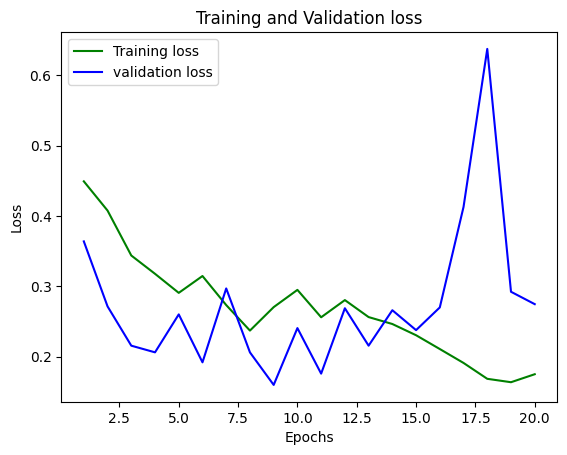

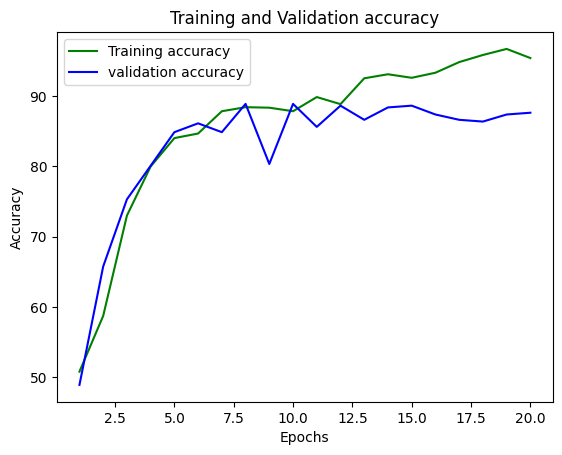

[[168  35]
 [ 14 180]]
True positive =  168
False positive =  35
False negative =  14
True negative =  180




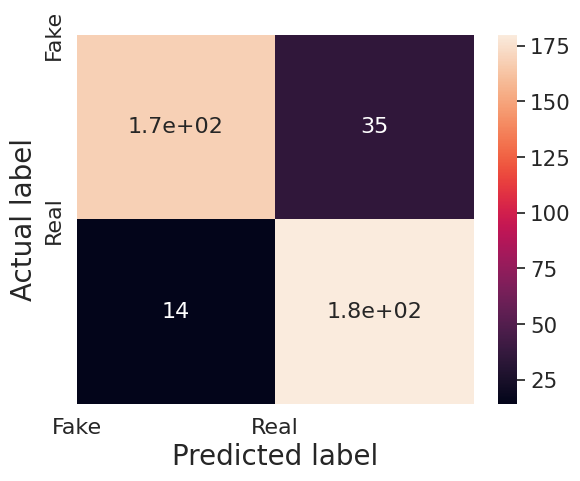

Calculated Accuracy 87.6574307304786


In [20]:
from sklearn.metrics import confusion_matrix

#learning rate
lr = 1e-5#0.001
#number of epochs
num_epochs = 20

optimizer = torch.optim.Adam(model.parameters(), lr= lr,weight_decay = 1e-5)

class_weights = torch.from_numpy(np.asarray([1,15])).type(torch.FloatTensor).cuda()
criterion = nn.CrossEntropyLoss(weight = class_weights).cuda()
# criterion = nn.CrossEntropyLoss().cuda()
# criterion = nn.BCELoss().cuda()

train_loss_avg =[]
train_accuracy = []
test_loss_avg = []
test_accuracy = []
for epoch in range(1,num_epochs+1):
    l, acc = train_epoch(epoch,num_epochs,train_loader,model,criterion,optimizer)
    train_loss_avg.append(l)
    train_accuracy.append(acc)
    true,pred,tl,t_acc = test(epoch,model,valid_loader,criterion)
    test_loss_avg.append(tl)
    test_accuracy.append(t_acc)
plot_loss(train_loss_avg,test_loss_avg,len(train_loss_avg))
plot_accuracy(train_accuracy,test_accuracy,len(train_accuracy))
print(confusion_matrix(true,pred))
print_confusion_matrix(true,pred)

Testing


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


[Batch 49 / 50]  [Loss: 0.569690, Acc: 84.26%]
Accuracy 84.26395939086295
[[86 20]
 [11 80]]
True positive =  86
False positive =  20
False negative =  11
True negative =  80




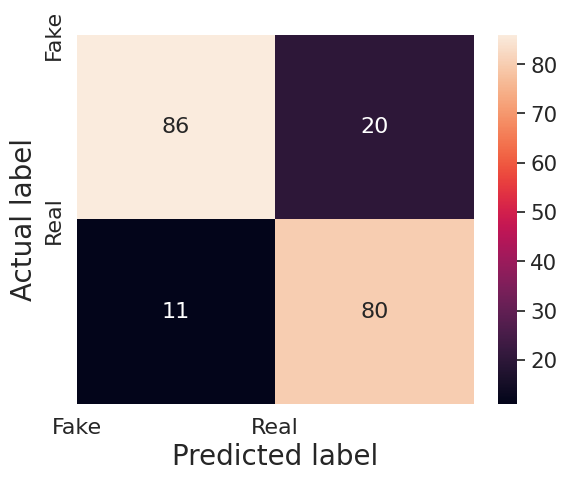

Calculated Accuracy 84.26395939086294


In [21]:
Real_test_loss_avg = []
Real_test_accuracy = []
RealTesttrue,RealTestpred,RealTesttl,RealTestt_acc = test(1,model,test_loader,criterion)
Real_test_loss_avg.append(RealTesttl)
Real_test_accuracy.append(RealTestt_acc)
print(confusion_matrix(RealTesttrue,RealTestpred))
print_confusion_matrix(RealTesttrue,RealTestpred)

In [25]:
torch.save(model.state_dict(), '/content/drive/MyDrive/model.pt')